**Prática de Segmentação de imagens**

In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

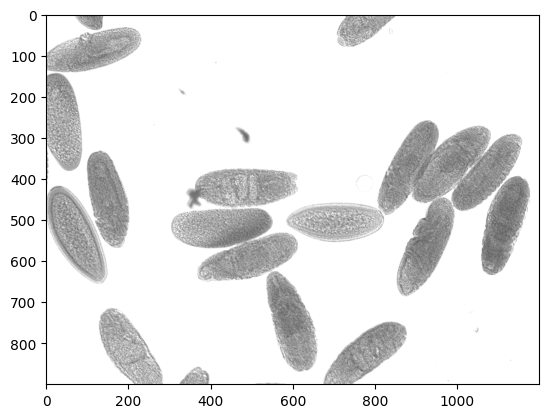

In [118]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


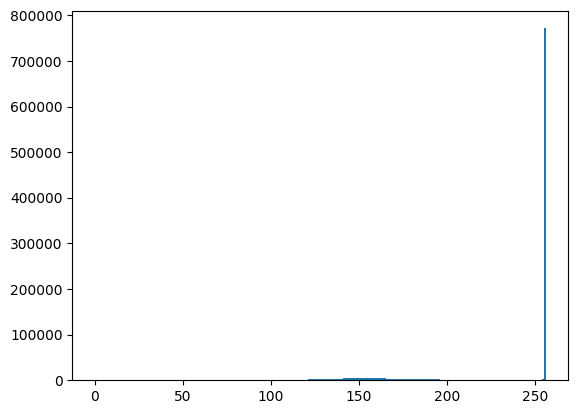

In [119]:
plt.hist(img1.ravel(), bins=256, range=(0, 256))
plt.show()

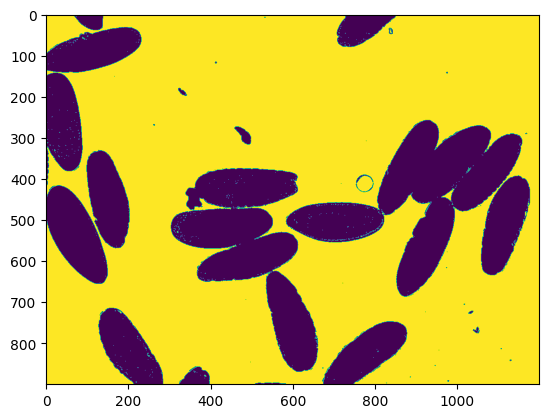

In [120]:
plt.imshow(img1>250)
plt.show()

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

In [121]:
def histImg(img):
    dict = { }
    height = img.shape[0]
    weight = img.shape[1]
    for i in range(0,256):
        dict[i] = 0.0
    for i in range(0,height):
        for j in range(0,weight):
            if img[i,j] in dict:
                dict[img[i,j]] = dict[img[i,j]] + 1
            else:
                dict[img[i,j]] = 1
    #for i in range(0,256):
    #    dict[i] = dict[i]/(height*weight)
    
    return dict

def drawHistImg(dict):
    plt.bar(dict.keys(), dict.values())
    plt.show()

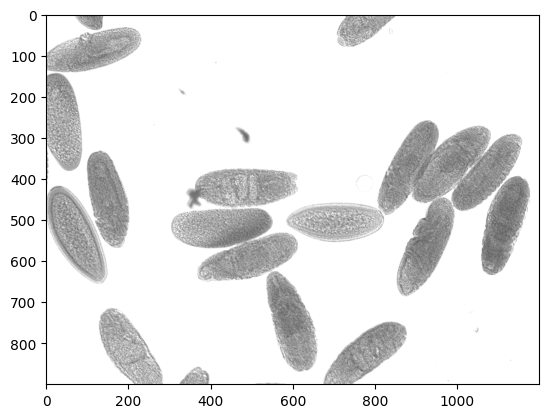

In [122]:
img = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


In [148]:
def meanIntensity(hist, index):
    total_intensity = sum(i * hist[i] for i in index)
    total_pixels = sum(hist[i] for i in index)
    
    if total_pixels == 0:
        return 0
    else:
        return total_intensity / total_pixels

def adaptativeThreshold(img, t=125, max_iterations = 100, tolerance=0.001):
    hist = histImg(img)
    T = t
    cont = 0
    while cont < max_iterations:
        G1 = [i for i in range(0,int(T))]
        G2 = [i for i in range(int(T),256)]
        u1 = meanIntensity(hist, G1)
        u2 = meanIntensity(hist, G2)
        new_T = (u1 + u2) / 2

        if abs(T - new_T) < tolerance:
            break

        T = new_T
        cont += 1

    return T

In [125]:
hist = histImg(img)

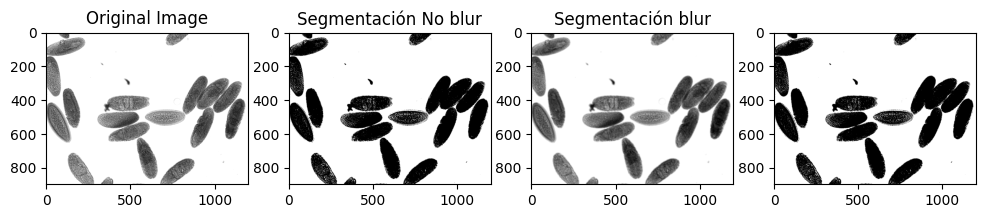

In [149]:
f, axarr = plt.subplots(1,4, figsize=(12,3))

segmentacion1 = img > adaptativeThreshold(img, t=125)
img2 = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
segmentacion2 = img > adaptativeThreshold(img2, t=125)

axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(segmentacion1, cmap='gray')
axarr[2].imshow(img2, cmap='gray')
axarr[3].imshow(segmentacion2, cmap='gray')

axarr[0].set_title('Original Image')
axarr[1].set_title('Segmentación No blur')
axarr[2].set_title('Image Blur)')
axarr[2].set_title('Segmentación blur')

plt.show()

Text(0.5, 1.0, 'Segmentación blur T = 206')

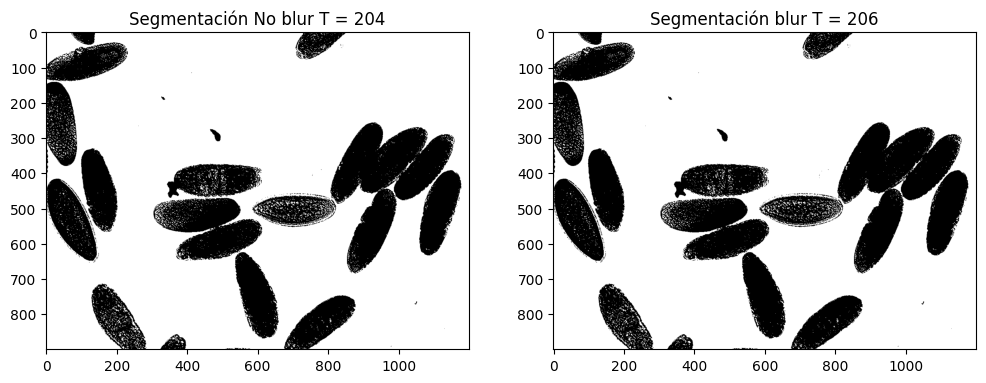

In [154]:
f, axarr = plt.subplots(1,2, figsize=(12,6))

trh1 = adaptativeThreshold(img, t=125)
segmentacion1 = img > trh1
img2 = cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
trh2 = adaptativeThreshold(img2, t=125)
segmentacion2 = img > trh2

axarr[0].imshow(segmentacion1, cmap='gray')
axarr[1].imshow(segmentacion2, cmap='gray')

axarr[0].set_title('Segmentación No blur T = '+str(int(trh1)))
axarr[1].set_title('Segmentación blur T = '+str(int(trh2)))

3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

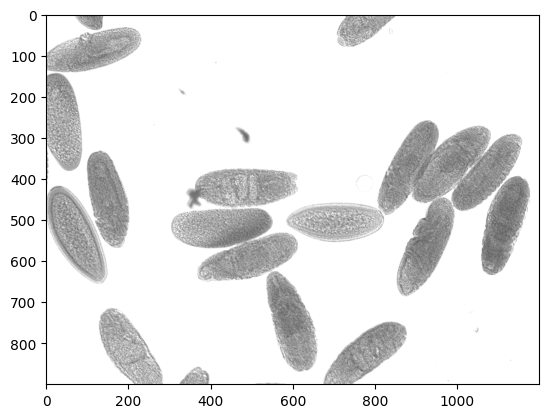

In [3]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

In [36]:
def otsu_threshold(image):
    # Compute the histogram of the image
    hist, bins = np.histogram(image, bins=256, range=(0, 256))

    # Total number of pixels in the image
    total_pixels = image.size

    # Initialize variables to store optimal threshold and maximum between-class variance
    max_variance = 0
    optimal_threshold = 0
    varianceList = []

    # Iterate through possible threshold values
    for threshold in range(256):
        # Calculate probabilities and means of the two classes
        w0 = np.sum(hist[:threshold]) / total_pixels
        w1 = 1 - w0
        u0 = np.sum(np.arange(threshold) * hist[:threshold]) / (w0 * total_pixels)
        u1 = np.sum(np.arange(threshold, 256) * hist[threshold:]) / (w1 * total_pixels)

        # Calculate between-class variance
        variance = w0 * w1 * (u0 - u1) ** 2
        varianceList.append(variance)
        # Update optimal threshold if variance is greater
        if variance > max_variance:
            max_variance = variance
            optimal_threshold = threshold
    varianceList = np.array(varianceList)

    varianceList[np.isnan(varianceList)] = 0
    
    return optimal_threshold, varianceList

C:\Users\Luis\AppData\Local\Temp\ipykernel_22316\207042530.py:17: RuntimeWarning: invalid value encountered in scalar divide
  u0 = np.sum(np.arange(threshold) * hist[:threshold]) / (w0 * total_pixels)


Text(0.5, 1.0, 'Segmentación blur T = 207')

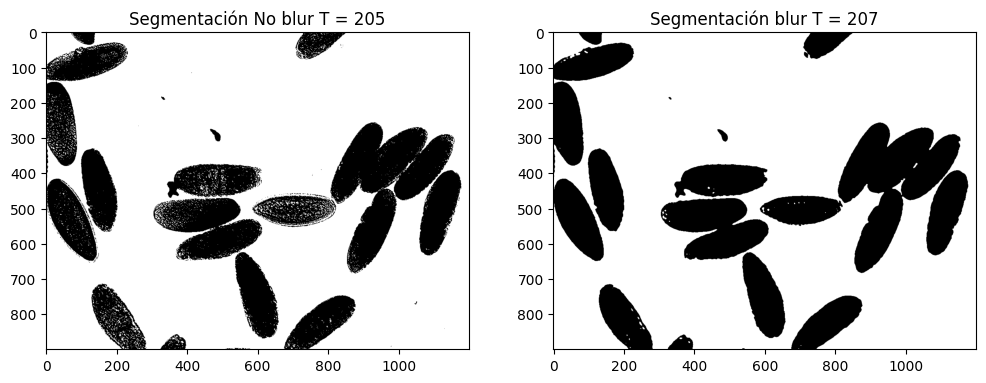

In [9]:
f, axarr = plt.subplots(1,2, figsize=(12,6))

trh1, var1 = otsu_threshold(img1)
segmentacion1 = img1 > trh1
img2 = cv2.GaussianBlur(img1,(7,7),cv2.BORDER_DEFAULT)
trh2,var2 = otsu_threshold(img2)
segmentacion2 = img2 > trh2

axarr[0].imshow(segmentacion1, cmap='gray')
axarr[1].imshow(segmentacion2, cmap='gray')

axarr[0].set_title('Segmentación No blur T = '+str(int(trh1)))
axarr[1].set_title('Segmentación blur T = '+str(int(trh2)))

In [15]:
hist, bins = np.histogram(img1, bins=256, range=(0, 256))

In [38]:
trh1, var1 = otsu_threshold(img1)
#var1

C:\Users\Luis\AppData\Local\Temp\ipykernel_22316\5016353.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u0 = np.sum(np.arange(threshold) * hist[:threshold]) / (w0 * total_pixels)


C:\Users\Luis\AppData\Local\Temp\ipykernel_22316\5016353.py:18: RuntimeWarning: invalid value encountered in scalar divide
  u0 = np.sum(np.arange(threshold) * hist[:threshold]) / (w0 * total_pixels)


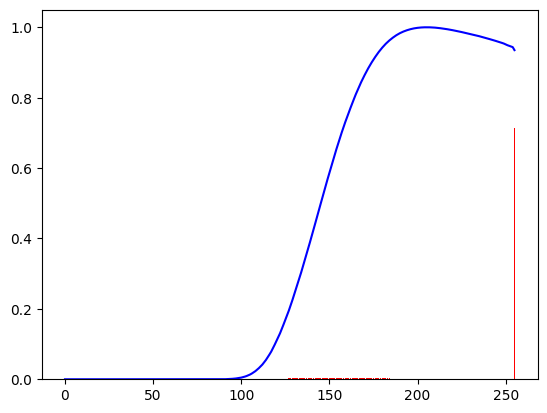

In [41]:
trh1, var1 = otsu_threshold(img1)
plt.bar([i for i in range(0,256)], hist/img1.size, color='red')
plt.plot([i for i in range(0,256)], var1/np.max(var1), color='blue')
plt.show()

C:\Users\Luis\AppData\Local\Temp\ipykernel_2316\207042530.py:17: RuntimeWarning: invalid value encountered in scalar divide
  u0 = np.sum(np.arange(threshold) * hist[:threshold]) / (w0 * total_pixels)


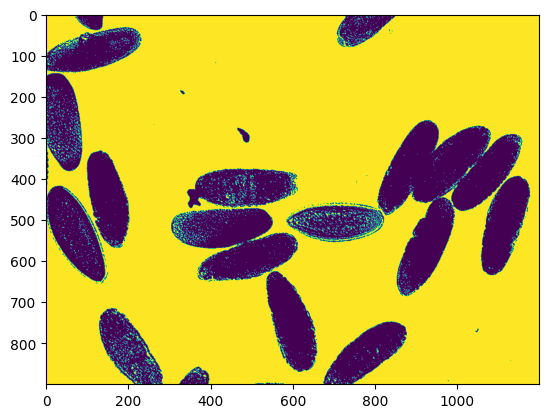

In [180]:
trh3 = otsu_threshold(img1)
plt.imshow(img1>trh3);

In [ ]:
4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

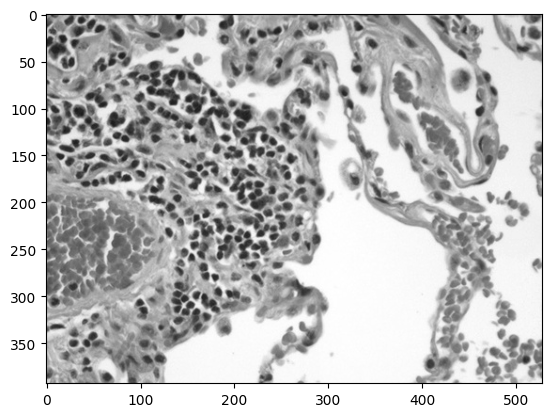

In [168]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

C:\Users\Luis\AppData\Local\Temp\ipykernel_2316\207042530.py:17: RuntimeWarning: invalid value encountered in scalar divide
  u0 = np.sum(np.arange(threshold) * hist[:threshold]) / (w0 * total_pixels)


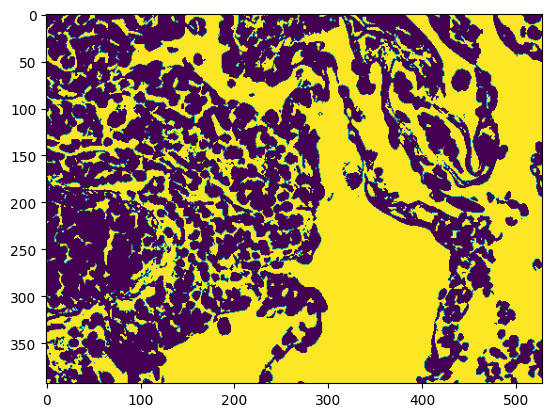

In [176]:
trh3 = otsu_threshold(img1)
plt.imshow(img1>=trh3);